In [18]:
#importing necessary libraries
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [19]:
pwd=os.getcwd()
filepath=os.path.join(pwd,"housing.csv")
filepath 

'c:\\Users\\Ernest\\Desktop\\Python\\housepricing\\housing.csv'

In [20]:
#Get the Data and name it hd{housingdata}
hd = pd.read_csv(filepath)
hd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [21]:
hd.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
hd.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
#median = hd.total_bedrooms.median()
#hd.fillna(median)

In [24]:
#Check the statistical measures of the numerical variables in the dataset
hd.describe().T 

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [25]:
hd.groupby('ocean_proximity')['median_income'].agg([np.mean,np.median,np.sum]).reset_index()

,ocean_proximity,mean,median,sum
0,<1H OCEAN,4.230682,3.87500,38651.5100
1,INLAND,3.208996,2.98770,21022.1353
2,ISLAND,2.744420,2.73610,13.7221
3,NEAR BAY,4.172885,3.81865,9555.9061
4,NEAR OCEAN,4.005785,3.64705,10647.3760


In [26]:
hd.ocean_proximity.value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

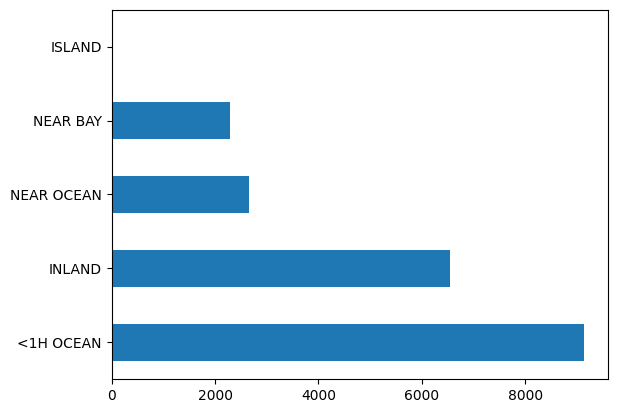

In [27]:
hd.ocean_proximity.value_counts().plot(kind="barh") # Its easier to understand data up to down as opposed to sideways

<AxesSubplot:>

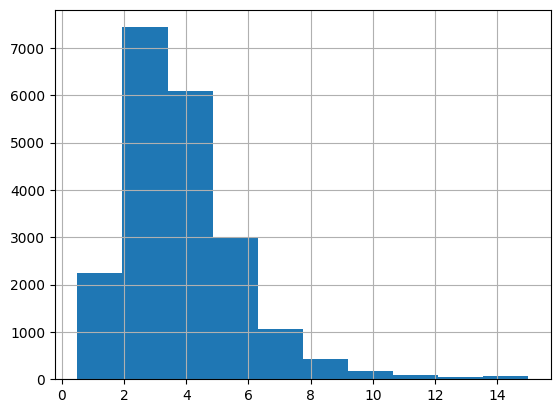

In [28]:
#Group the values  
hd.median_income.hist() 

In [29]:
#Apply pd.cut() to create a new column representing income categories
hd["income_cat"] = pd.cut(hd["median_income"],
                          bins=[0.,1.5,3.0,4.5,6.,np.inf],
                          labels=[1,2,3,4,5])
hd.income_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

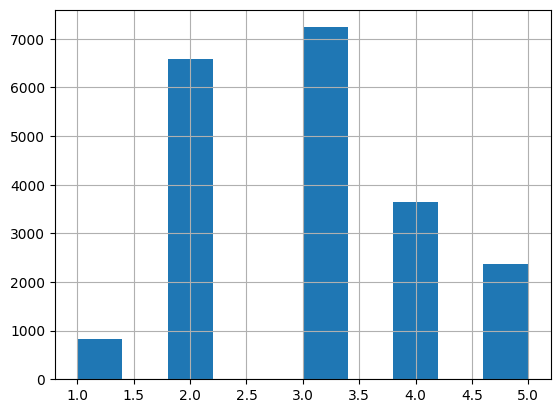

In [30]:
hd.income_cat.hist()

In [31]:
y = hd.median_house_value #labels
X = hd.drop("median_house_value", axis=1) #Predicters 
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


*Spliting Datasets*

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.33)
X_train 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4144,-118.19,34.12,44.0,1219.0,324.0,1036.0,282.0,4.0417,<1H OCEAN,3
17068,-122.24,37.55,3.0,6164.0,1175.0,2198.0,975.0,6.7413,NEAR BAY,5
4172,-118.23,34.10,38.0,1051.0,249.0,799.0,229.0,2.7120,<1H OCEAN,2
10276,-117.88,33.85,22.0,1105.0,241.0,971.0,249.0,3.1667,<1H OCEAN,3
8918,-118.48,34.02,11.0,72.0,16.0,150.0,20.0,2.6250,<1H OCEAN,2
...,...,...,...,...,...,...,...,...,...,...
13023,-121.23,38.67,27.0,5266.0,971.0,2432.0,948.0,3.8954,INLAND,3
19758,-122.23,40.17,21.0,1401.0,331.0,651.0,299.0,2.2250,INLAND,2
1533,-122.05,37.90,32.0,2676.0,484.0,986.0,473.0,4.6528,NEAR BAY,4
15461,-117.24,33.17,4.0,9998.0,1874.0,3925.0,1672.0,4.2826,<1H OCEAN,3


<AxesSubplot:>

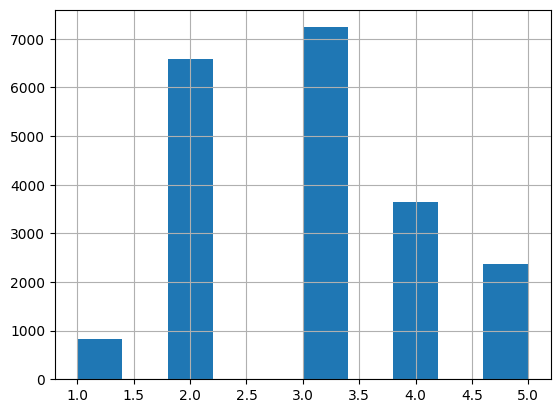

In [33]:
hd.income_cat.hist() 

<AxesSubplot:>

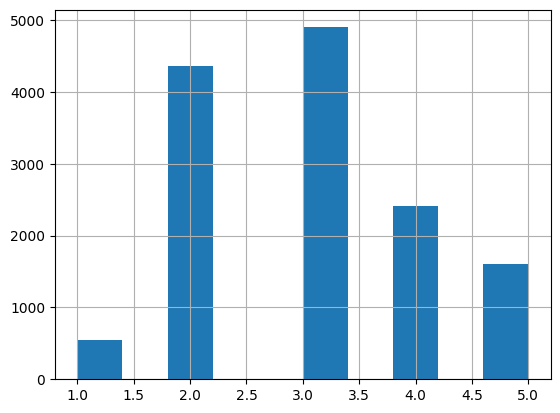

In [34]:
#To check if the distribution of values within the training set approx similar to the testing set
X_train.income_cat.hist() 

Stratified Split

In [35]:
#Splitting the data in a stratified manner to make train and test set have same approximate distribution
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(hd,hd.income_cat):
    strat_train_set = hd.loc[train_index]
    strat_test_set = hd.loc [test_index] 

In [36]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [37]:
strat_test_set.income_cat.value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [38]:
len(hd)

20640

In [39]:
hd.income_cat.value_counts() / len(hd)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

We will need to use a pairplot to identify relationships between variables that might not have been obvious from looking at individual plots.


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

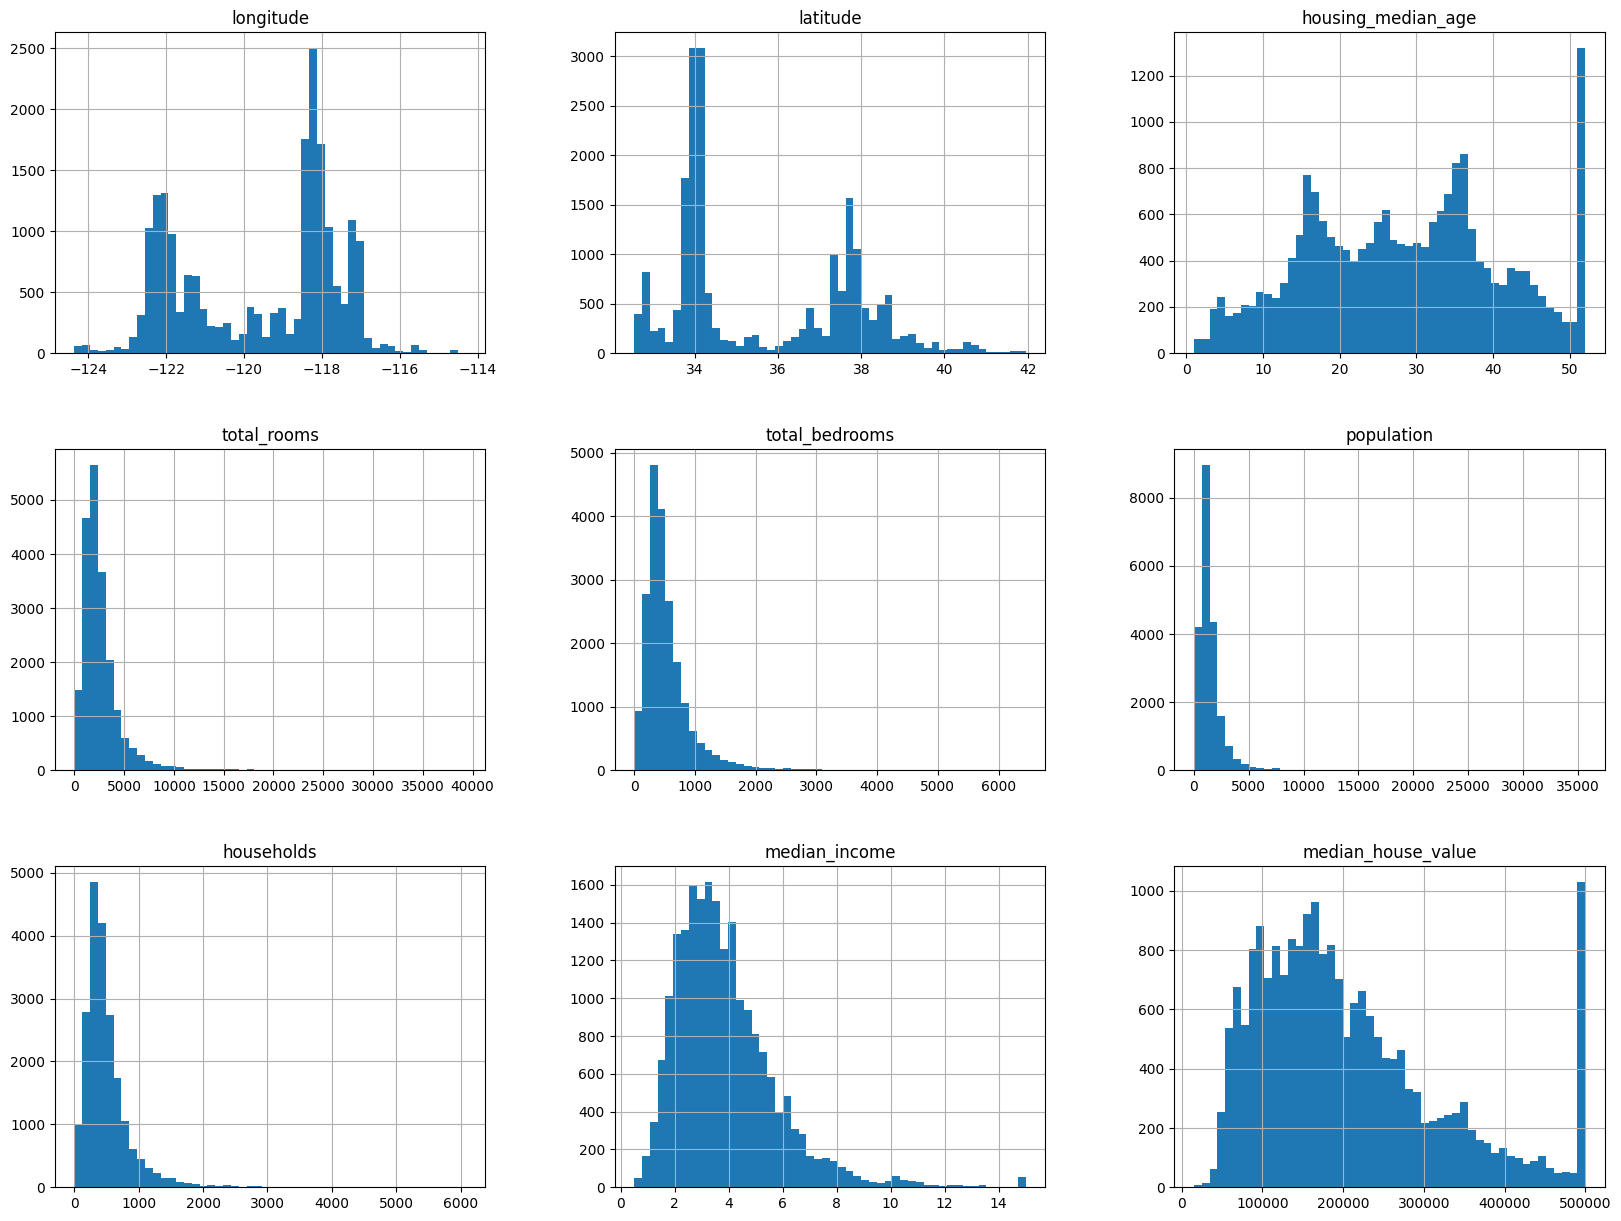

In [40]:
# Lets use the diagram kind as Histogram
hd.hist(bins=50,figsize=(20,15))

In [41]:
#sns.pairplot(hd,hue="median_income")

<AxesSubplot:>

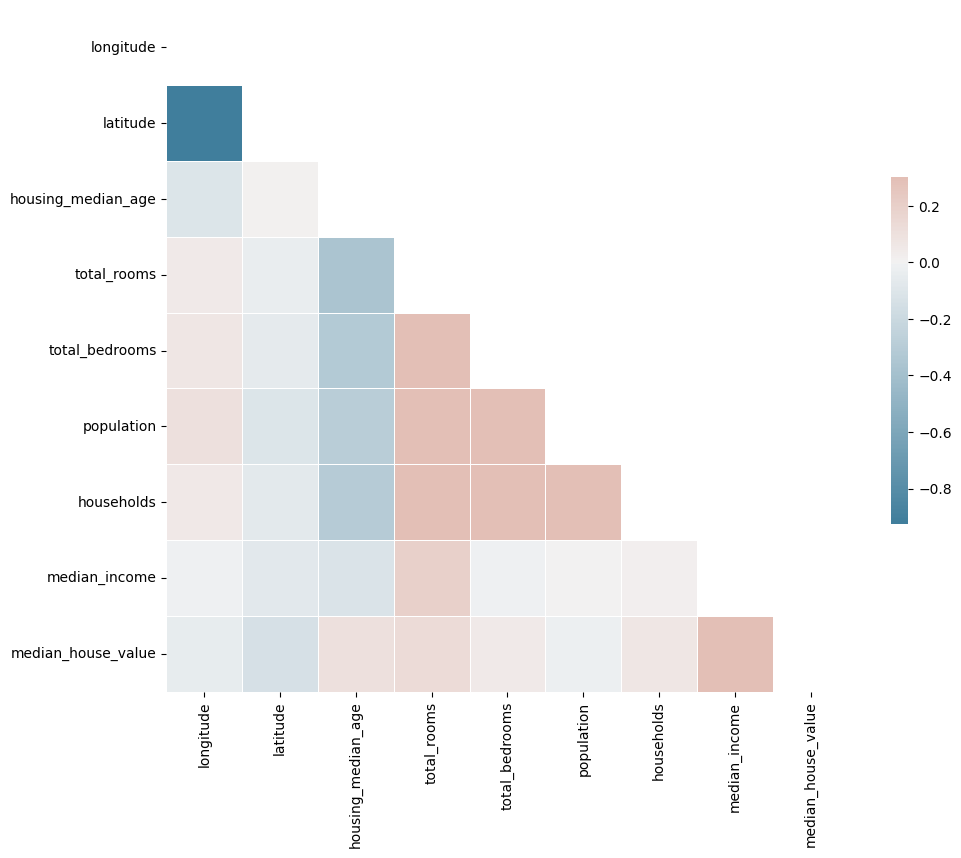

In [42]:
#Bespoke Heatmap
corr = hd.corr() 
mask = np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidth=.5,cbar_kws={"shrink":.5})

# Delving into Machine Learning

In [43]:
housing =  strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [44]:
#dealing with missing values
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [45]:
median = housing.total_bedrooms.median()
sample_incomplete_rows.total_bedrooms.fillna(median,inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN,5


In [46]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [47]:
#Fitting the model
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [48]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


 Encoding categorical Variables 

In [49]:
hd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [50]:
housing_cat = housing[["ocean_proximity"]]
housing_cat 

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # creating a dense array  meaning all the instances have value not just the ones we already encoded
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Feature Engineering
- we use the domain knowledge to create new columns using raw data 

In [52]:
#Creating a function that creates new columns
def feature_engineering (data):
    data["bedrooms_per_household"] = data['total_bedrooms'] / data["households"]
    data['population_per_household'] = data['population'] / data['households']
    data['rooms_per_household'] = data["total_rooms"] / data["households"]
    return data 

In [53]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,3.886128
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,6.096552
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,6.658342
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,5.571932
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,4.110465
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,6.297405


# Scaling The Data
- This ensures that the model doesn't place importance on columns with higher values in it

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.01407228]])

# Pipeline

In [55]:
#Lets create a Pipeline to allow us do data transformation sequentially 

housing = strat_train_set.drop('median_house_value',axis=1)

housing_labels = strat_train_set['median_house_value'].copy()

def data_transformations(data):
    #separate labels if they exist#
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value",axis=1)
        
    else:
        labels = None  
        
    #Feature Engineering  
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) #creating the list of our features for future use
    
    #Imputing Data
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer (strategy="median")
    
    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)      
    
    ##Encoding categorical Data
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])
    
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat) 
    feature = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # we don't need this variable in the lists anymore since we are encoding it
    
    ##Scaling Numerical Data##
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    housing_scaled = scaler.fit_transform(imputed)
    
    #Concatenating All Data
    output = np.hstack([housing_scaled,housing_cat_1hot])

    return output, labels, features
    

# Model Selection and Training

In [56]:
#We then transform the data using the pipeline we created 
train_data, train_labels, features = data_transformations(strat_train_set)
train_data

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  1.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  1.        ,
         0.        ,  0.        ]])

In [57]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household']

In [58]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data                         

array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  1.        ,
         0.        ,  0.        ]])

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_data,train_labels) # this is now a trained model

LinearRegression()

In [60]:
# Let us now compare against some Test Data
original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data = {"Original Values":original_values,"Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,430272.0,69729.0
17352,162500.0,287104.0,-124604.0
3505,204600.0,231936.0,-27336.0
7777,159700.0,194176.0,-34476.0
14155,184000.0,248128.0,-64128.0


Metrics

In [61]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values,predicted_values) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse # The performance is off by 72713.8805359747 which is not acceptable

72713.8805359747

# Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data,train_labels)

DecisionTreeRegressor(random_state=42)

In [63]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels,train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # The performance seems too perfect to be true - We might therefore need to employ K-fold Cross-Validation to split our data into sections(kfolds)

0.0

Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,train_data,train_labels,scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [65]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("standard deviation:", scores.std())
display_scores(tree_rmse_scores)    

Scores: [70824.86460222 69265.43911105 70860.89128052 73143.6242732
 68189.79683417 74845.58694955 75712.26299821 70925.68914136
 69652.74404875 72834.24516312]
Mean: 71625.51444021543
standard deviation: 2319.858754337931


# Random Forest Regressor 

In [66]:
#Combines different methods together 
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(train_data,train_labels)

RandomForestRegressor(random_state=42)

In [67]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels,train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse # This is significantly better 

18796.98816862067

In [68]:
# Cross Validation
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg,train_data,train_labels,scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [70824.86460222 69265.43911105 70860.89128052 73143.6242732
 68189.79683417 74845.58694955 75712.26299821 70925.68914136
 69652.74404875 72834.24516312]
Mean: 71625.51444021543
standard deviation: 2319.858754337931


In [69]:
scores = cross_val_score(forest_reg,train_data,train_labels, scoring = "neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     50567.392348
std       2402.289546
min      46903.219866
25%      48687.667613
50%      50686.765902
75%      51947.211665
max      54583.309690
dtype: float64

Hyperparameter Optimization (Fine Tuning the model)

In [70]:
#Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [
    #lets start with (3*4)-12 combinations of hyperparameters
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    #lets again try 6 (2*3) combinations with bootstraps set as False
    {'bootstrap': [False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor(random_state=42)
#train across 5 folds thats a total of (12*6)*5 = 90 rounds of training

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(train_data,train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
grid_search.best_params_ 

{'max_features': 8, 'n_estimators': 30}

In [72]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [73]:
cvres=grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt (-mean_score),params)

64772.12310826017 {'max_features': 2, 'n_estimators': 3}
57072.09148438375 {'max_features': 2, 'n_estimators': 10}
54437.347665709625 {'max_features': 2, 'n_estimators': 30}
62065.79799705809 {'max_features': 4, 'n_estimators': 3}
54799.23918359469 {'max_features': 4, 'n_estimators': 10}
52251.42550351866 {'max_features': 4, 'n_estimators': 30}
61827.24216362284 {'max_features': 6, 'n_estimators': 3}
54454.39027503683 {'max_features': 6, 'n_estimators': 10}
51699.580397496175 {'max_features': 6, 'n_estimators': 30}
59714.39845322457 {'max_features': 8, 'n_estimators': 3}
52876.605451629955 {'max_features': 8, 'n_estimators': 10}
51253.27811015222 {'max_features': 8, 'n_estimators': 30}
63107.485726344115 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55910.52432366365 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62249.214957622506 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54801.69458055852 {'bootstrap': False, 'max_features': 3, 'n_estimators

 Randomized Search

In [74]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint 

param_distribs = {
    'n_estimators': randint (low=1,high=200),
    'max_features': randint (low=1,high= 8),
}
forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg,param_distributions = param_distribs,n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=42)

rnd_search.fit(train_data,train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002E0908DEBF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002E0908DEA10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [75]:
cvres = rnd_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres['params']):
    print(np.sqrt(-mean_score),params)

50328.151594744944 {'max_features': 7, 'n_estimators': 180}
53092.39469233686 {'max_features': 5, 'n_estimators': 15}
52260.393722518136 {'max_features': 3, 'n_estimators': 72}
52189.297463440555 {'max_features': 5, 'n_estimators': 21}
50484.57189087649 {'max_features': 7, 'n_estimators': 122}
52233.51553203958 {'max_features': 3, 'n_estimators': 75}
52196.08229124017 {'max_features': 3, 'n_estimators': 88}
50960.749886872545 {'max_features': 5, 'n_estimators': 100}
51952.307014342405 {'max_features': 3, 'n_estimators': 150}
64994.2748914946 {'max_features': 5, 'n_estimators': 2}


In [76]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([6.39148152e-02, 5.58051520e-02, 4.52333526e-02, 1.69086980e-02,
       1.86781006e-02, 1.84525201e-02, 1.70122234e-02, 2.56282131e-01,
       2.36956639e-02, 1.05468475e-01, 5.43667936e-02, 9.28615766e-03,
       1.15898730e-01, 3.76790054e-05, 2.17296068e-03, 4.19236859e-03,
       2.02315059e-03, 4.43890239e-02, 6.11099367e-03, 1.21321077e-02,
       1.27938903e-01])

List of Feature Importance

In [77]:
feature_importance_list = list(zip(features,feature_importance.tolist()))
feature_importance_list

[('longitude', 0.06391481524820194),
 ('latitude', 0.0558051520001248),
 ('housing_median_age', 0.045233352612469316),
 ('total_rooms', 0.016908697973777902),
 ('total_bedrooms', 0.018678100553504214),
 ('population', 0.018452520074436412),
 ('households', 0.017012223418439),
 ('median_income', 0.25628213062864275),
 ('income_cat', 0.023695663893963666),
 ('bedrooms_per_household', 0.10546847471924357),
 ('population_per_household', 0.05436679364054505),
 ('rooms_per_household', 0.009286157655835984)]

In [78]:
sorted_list = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
sorted_list                                                                   

[('median_income', 0.25628213062864275),
 ('bedrooms_per_household', 0.10546847471924357),
 ('longitude', 0.06391481524820194),
 ('latitude', 0.0558051520001248),
 ('population_per_household', 0.05436679364054505),
 ('housing_median_age', 0.045233352612469316),
 ('income_cat', 0.023695663893963666),
 ('total_bedrooms', 0.018678100553504214),
 ('population', 0.018452520074436412),
 ('households', 0.017012223418439),
 ('total_rooms', 0.016908697973777902),
 ('rooms_per_household', 0.009286157655835984)]

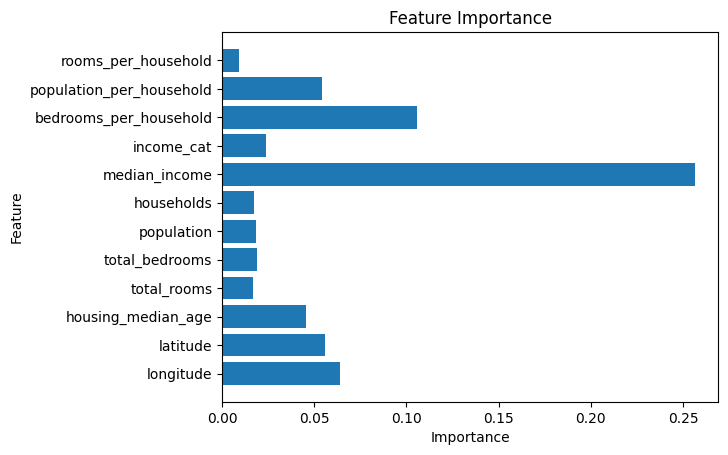

In [79]:
# Extracting the feature names and their corresponding values
feature_names = [item[0] for item in feature_importance_list]
values = [item[1] for item in feature_importance_list]

# bar graph
plt.barh(range(len(feature_names)), values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show() 